# Filtering and predicting using the Gaussian Process filter


In [96]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import GaussianProcessFilter

from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

## Adding white noise to the sine wave

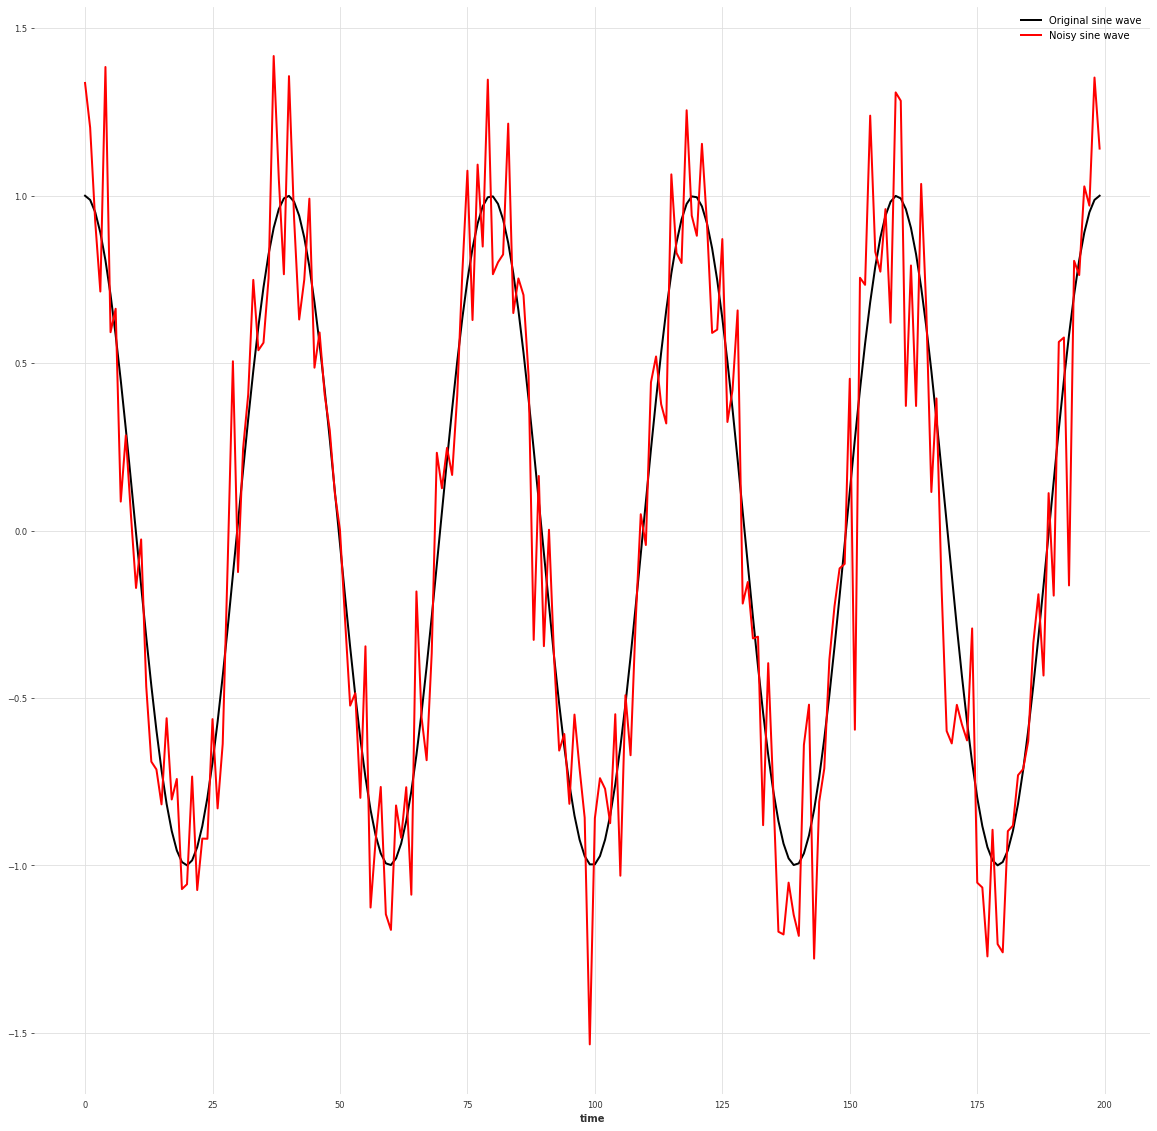

In [97]:
NOISE_DISTANCE = 0.5
SAMPLE_SIZE = 200
RESIZE_NOISE = .5

# Prepare the drawing
theta = np.radians(np.linspace(0,360*5,SAMPLE_SIZE))
x_2 = TimeSeries.from_values(np.cos(theta))

# add white noise (gaussian noise, can be mapped from the random distribution using rand**3)
# and resize to RESIZE_NOISE
noise = TimeSeries.from_values(np.random.normal(0, NOISE_DISTANCE, SAMPLE_SIZE)*RESIZE_NOISE)
x_2_noise = x_2 + noise

plt.figure(figsize=[20,20])
x_2.plot(label='Original sine wave')
x_2_noise.plot(color='red', label='Noisy sine wave')
plt.legend()
plt.show()

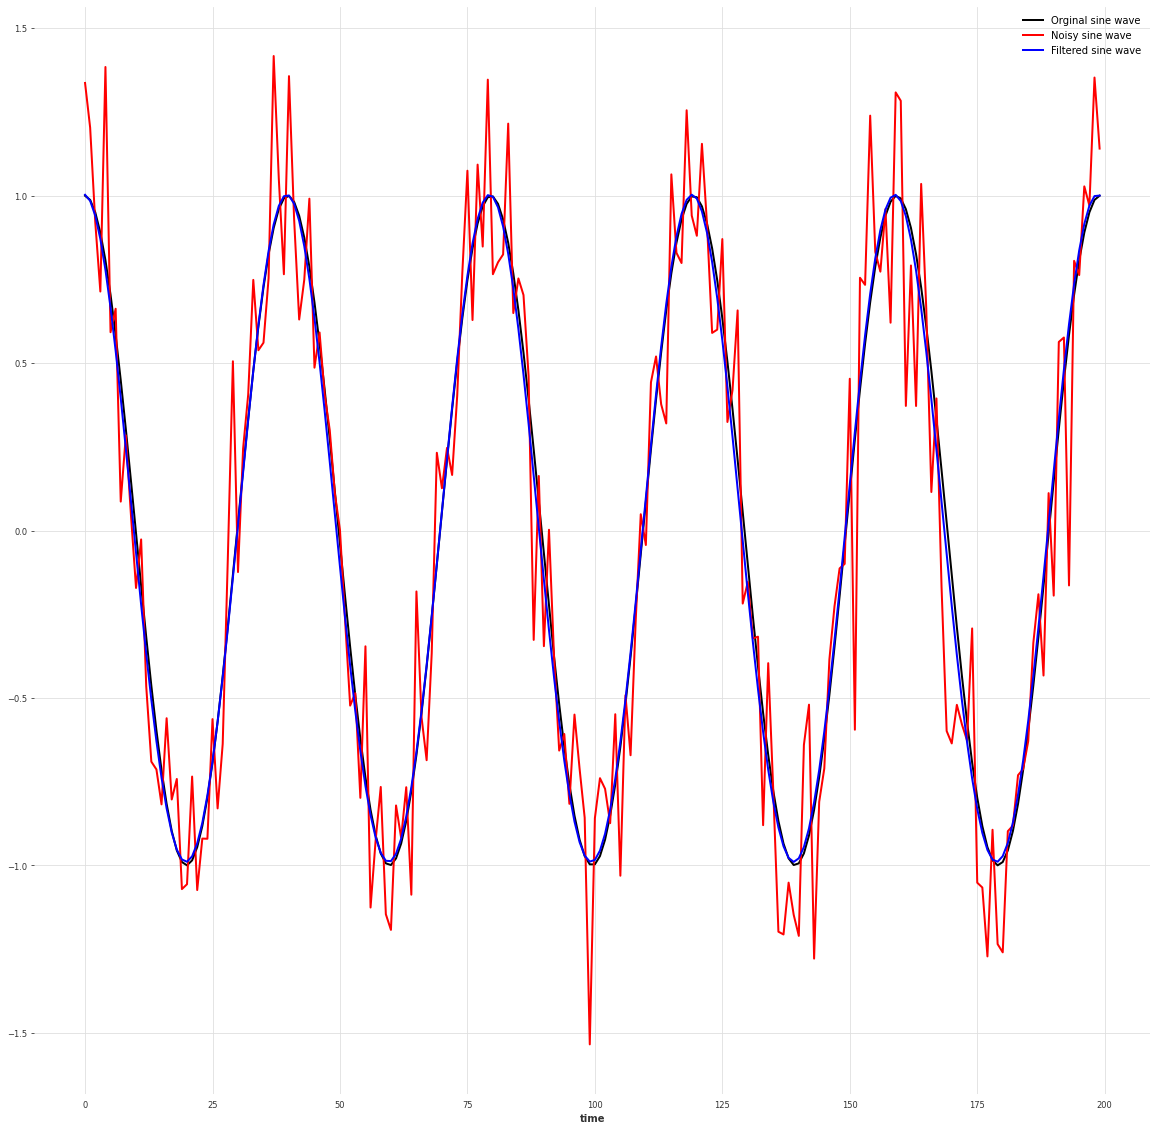

In [100]:
# kernel = RBF()
kernel = ExpSineSquared()

GP = GaussianProcessFilter(kernel=kernel, alpha=0.5, n_restarts_optimizer=100)
filtered_x = GP.filter(x_2_noise)

plt.figure(figsize=[20,20])
x_2.plot(color='black', label='Orginal sine wave')
x_2_noise.plot(color='red', label='Noisy sine wave')
filtered_x.plot(color='blue', label='Filtered sine wave')
plt.legend()

/Users/tomasvanpottelbergh/miniforge3/envs/darts/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


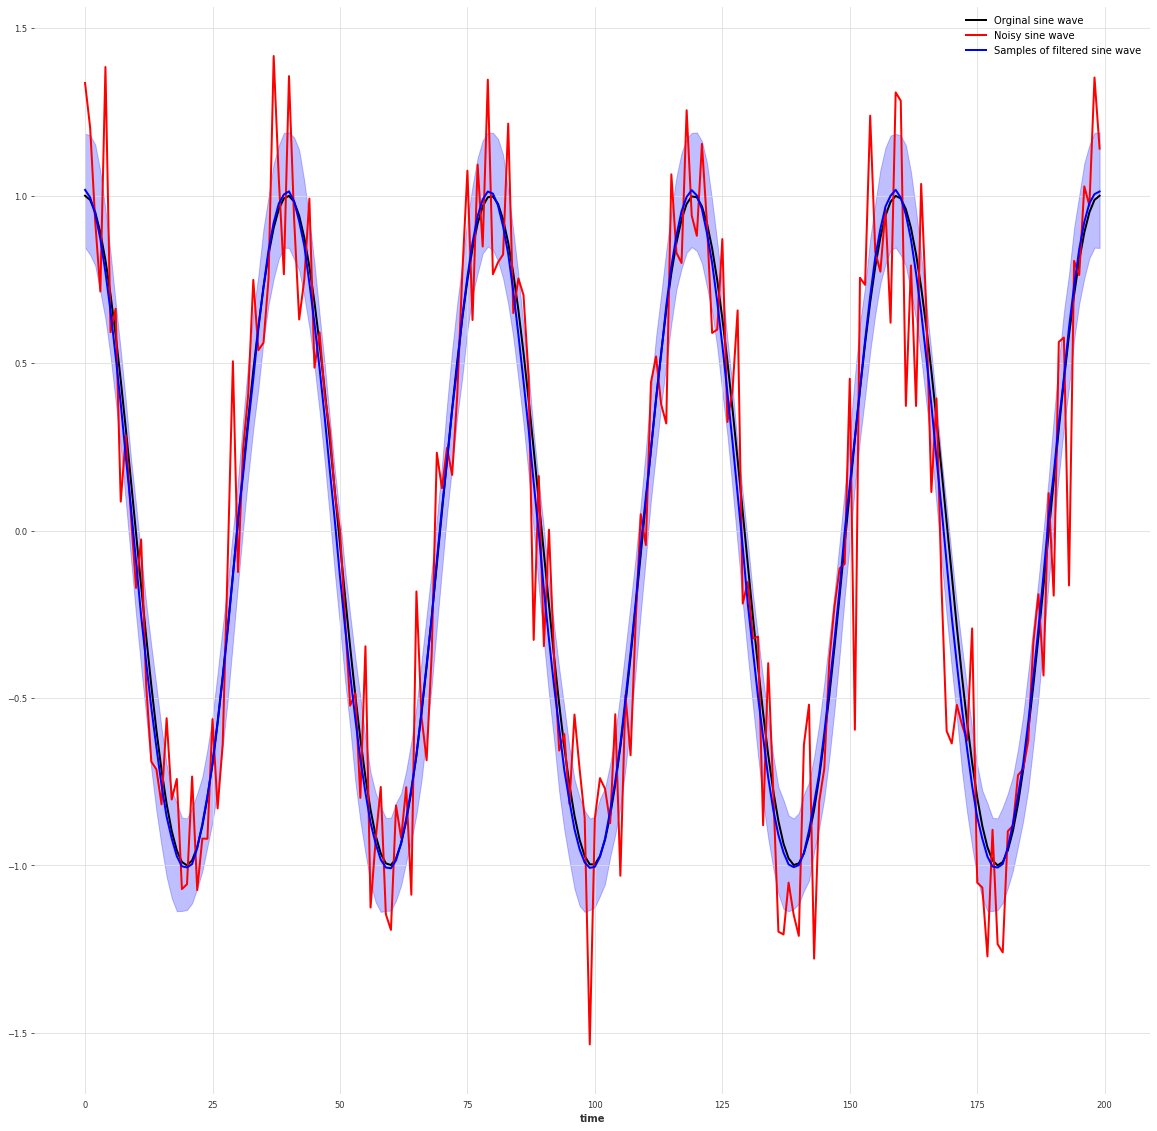

In [101]:
filtered_x_samples = GP.filter(x_2_noise, num_samples=100)

plt.figure(figsize=[20,20])
x_2.plot(color='black', label='Orginal sine wave')
x_2_noise.plot(color='red', label='Noisy sine wave')
filtered_x_samples.plot(color='blue', label='Samples of filtered sine wave')
plt.legend()